In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train , y_train) , (X_test , y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [7]:
single_image = X_train[0]
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

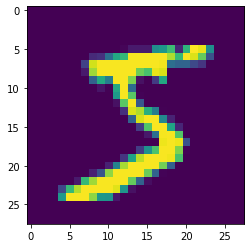

In [11]:
plt.imshow(single_image)

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train.shape

(60000,)

In [16]:
y_example = to_categorical(y_train)

In [17]:
y_example.shape

(60000, 10)

In [18]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [19]:
y_cat_train = to_categorical(y_train)

In [22]:
single_image.min()

0

In [23]:
X_train = X_train/255
X_test = X_test/255

In [24]:
scaled_image = X_train[0]

In [25]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

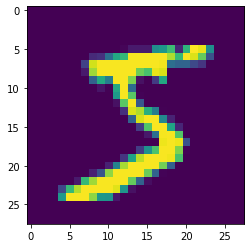

In [27]:
plt.imshow(scaled_image)

In [28]:
X_train.shape

(60000, 28, 28)

In [29]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten

In [31]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size = (4,4), input_shape = (28,28,1), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10 , activation = "softmax"))

model.compile(loss = "categorical_crossentropy" , optimizer= "adam" , metrics = ["accuracy"])

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = "val_loss" , patience = 1)

In [33]:
model.fit(X_train , y_cat_train , epochs = 10 , validation_data = (X_test , y_cat_test), callbacks = [early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 43s 715us/sample - loss: 0.1423 - accuracy: 0.9583 - val_loss: 0.0545 - val_accuracy: 0.9826
Epoch 2/10
60000/60000 [==============================] - 37s 620us/sample - loss: 0.0489 - accuracy: 0.9850 - val_loss: 0.0431 - val_accuracy: 0.9855
Epoch 3/10
60000/60000 [==============================] - 37s 616us/sample - loss: 0.0302 - accuracy: 0.9904 - val_loss: 0.0439 - val_accuracy: 0.9851


In [34]:
metrics = pd.DataFrame(model.history.history)

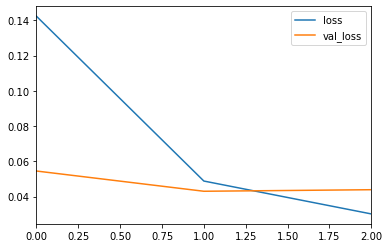

In [38]:
metrics[["loss" , "val_loss"]].plot()

In [39]:
model.evaluate(X_test,y_cat_test , verbose = 0)

[0.0439389026097022, 0.9851]

In [40]:
from sklearn.metrics import classification_report , confusion_matrix


In [41]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test , predictions))

precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       1.00      0.98      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.98      0.99      0.98     10000
weighted avg       0.99      0.99      0.99     10000



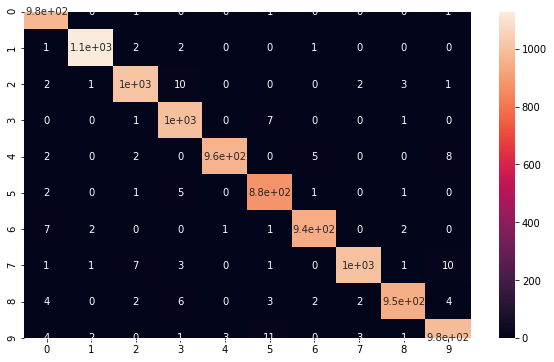

In [43]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test , predictions),annot=True)

In [44]:
my_image = X_test[0].reshape(28,28)

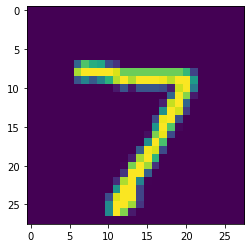

In [45]:
plt.imshow(my_image)

In [46]:
model.predict_classes(my_image.reshape(1,28,28,1))

array([7], dtype=int64)